<a href="https://colab.research.google.com/github/Sara19598/Cardiovascular-Risk-Prediction-ML-Classification/blob/main/Cardiovascular_Risk_Prediction_Poonam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cardiovascular Risk Prediction Project**

**The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.**

# **Data Description :**

**Variables :**

**Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.**

**Demographic:**

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)

**Behavioral :**

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) 

**Medical( history)**


• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

**•Predict variable (desired target)**

10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
Dv 

# **Connecting with the Drive-**

In [2]:
# Mounting Drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#loading the Required libraries-
import pandas as pd                 #Extensively used to load and wrangle with the dataset.
import numpy as np                  #For some math operations in predictions
import matplotlib.pyplot as plt     #Used for visualization.
import seaborn as sns               #Used for visualization.
import missingno as mno             #install  pip install missingno
import warnings                     #For filtering and ignoring the warnings.
warnings.filterwarnings('ignore')
from scipy import stats             #used for statistical analysis
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")


In [4]:
# Loading data set of csv file
df=pd.read_csv('/content/drive/MyDrive/Capstone Project 3- ML Classification/data_cardiovascular_risk.csv')

# ***Data Summary***

- Size of the dataset.
- Printing few rows of it.
- What type of feature in our dataset.

In [5]:
#To view the dataset 
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [6]:
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [7]:
#Shape of the dataset
df.shape

(3390, 17)

In [8]:
#To get the columns of the dataset
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [9]:
# number of unique values that each column contains
df.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

In [10]:
#showing the datatype of all features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [11]:
#Summary of the dataset
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


# ***Data Cleaning***

In [12]:
df.drop("id",axis=1,inplace=True)
df.drop_duplicates(inplace=True)

In [13]:
#Checking of Missing value
df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

### ***Comment:- There are misisng values present in the features such as education,cigsPerDay, BPMeds, totChol, BMI,heartRate & glucose.***

In [14]:
# To remove the missing values-
df.dropna(axis=0,inplace=True)
df.shape

(2927, 16)

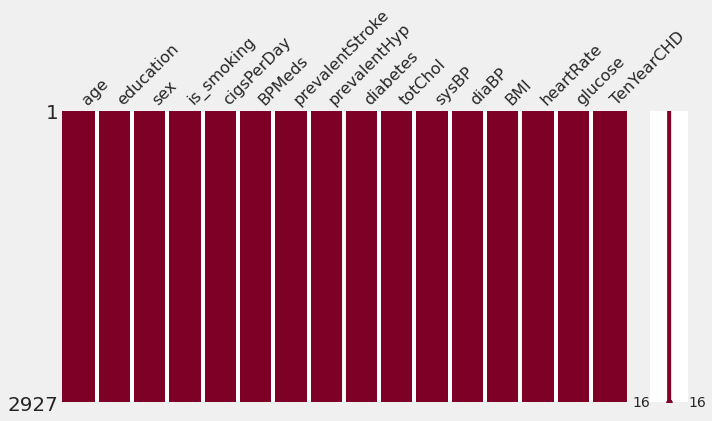

In [15]:
#Visualization of NAN values in the dataset-
mno.matrix(df,figsize=(10,5),color=(0.5,0.0,0.15))

In [16]:
df.TenYearCHD.value_counts()

0    2483
1     444
Name: TenYearCHD, dtype: int64

### ***This shows that our Target variable is classified in "0" and "1" category which implies that we have to perform Classification model for our dataset to analyse and interpret the dataset.***

# ***Data Visualization***

**Seprate dependent and independent variables**

In [17]:
dependent_variable = 'TenYearCHD'

In [18]:
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
independent_variables

['diaBP',
 'sysBP',
 'heartRate',
 'BMI',
 'diabetes',
 'age',
 'is_smoking',
 'BPMeds',
 'prevalentStroke',
 'sex',
 'cigsPerDay',
 'prevalentHyp',
 'education',
 'glucose',
 'totChol']

In [19]:
# Divide the columns based on the type for clear management
col_Demographic = [ 'age', 'education', 'sex']

col_Behavioral = ['is_smoking', 'cigsPerDay']

col_medical_history = ['BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']

col_medical_current = ['totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

col_target = ['TenYearCHD']

In [20]:
independent_vars = df[col_Demographic + col_Behavioral + col_medical_history + col_medical_current]
dependent_vars = df[col_target]

In [21]:
independent_vars.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000
mean,49.507345,1.965494,9.112743,0.030065,0.006150,0.314315,0.026990,237.129142,132.626409,82.906218,25.797041,75.888282,81.934404,237.129142,132.626409,82.906218,25.797041,75.888282,81.934404
std,8.597191,1.017199,11.882784,0.170795,0.078192,0.464322,0.162082,44.613282,22.326197,12.078873,4.130376,11.971207,24.106943,44.613282,22.326197,12.078873,4.130376,11.971207,24.106943
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.960000,45.000000,40.000000,113.000000,83.500000,48.000000,15.960000,45.000000,40.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,74.500000,23.030000,68.000000,71.000000,206.000000,117.000000,74.500000,23.030000,68.000000,71.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.500000,82.000000,25.380000,75.000000,78.000000,234.000000,128.500000,82.000000,25.380000,75.000000,78.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.040000,83.000000,87.000000,264.000000,144.000000,90.000000,28.040000,83.000000,87.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000


In [22]:
dependent_vars.describe()

,TenYearCHD
count,2927.000000
mean,0.151691
std,0.358783
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


**Hitogram for all the features to understand the distribution**

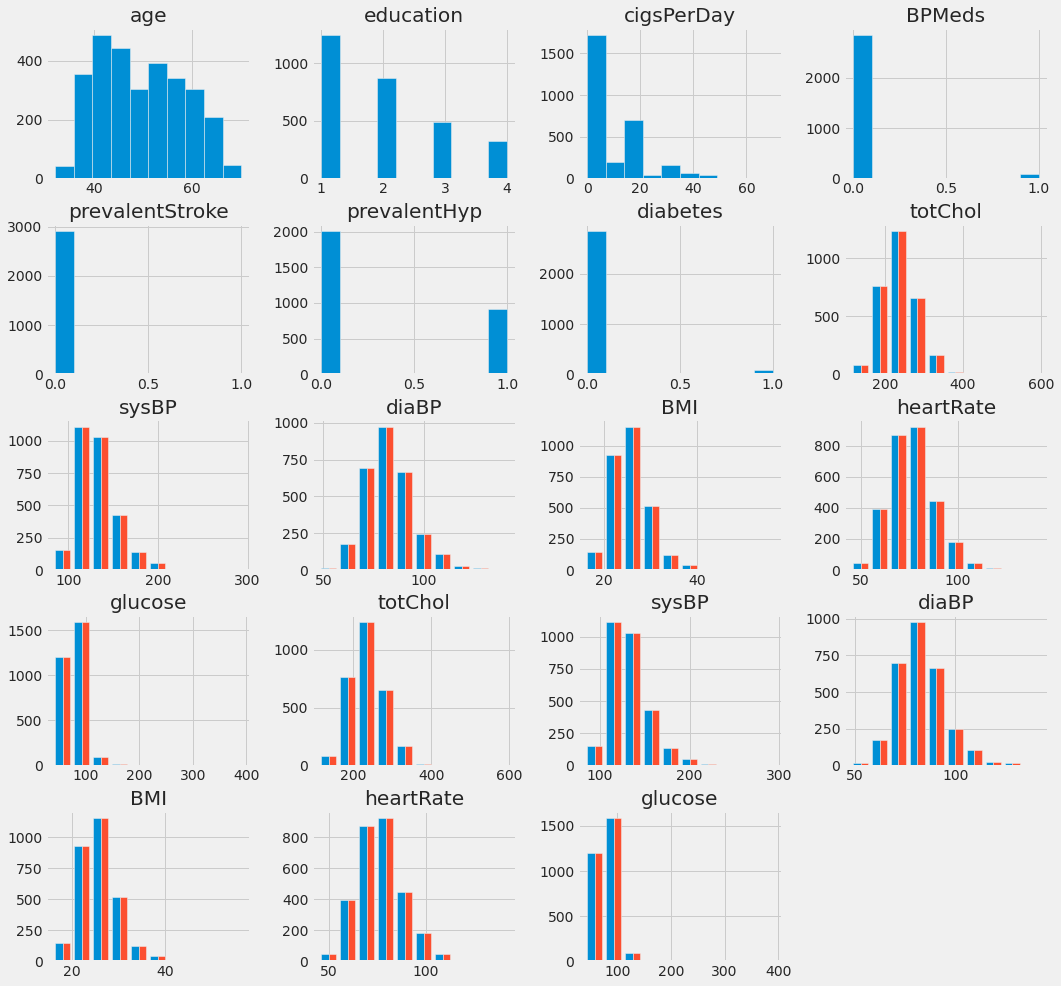

In [23]:
independent_vars.hist(figsize= (16,16))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f396d026950>]],
      dtype=object)

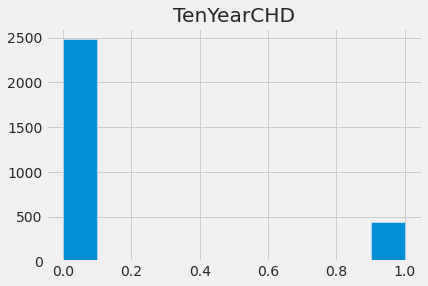

In [24]:
dependent_vars.hist()

## ***Outliers***

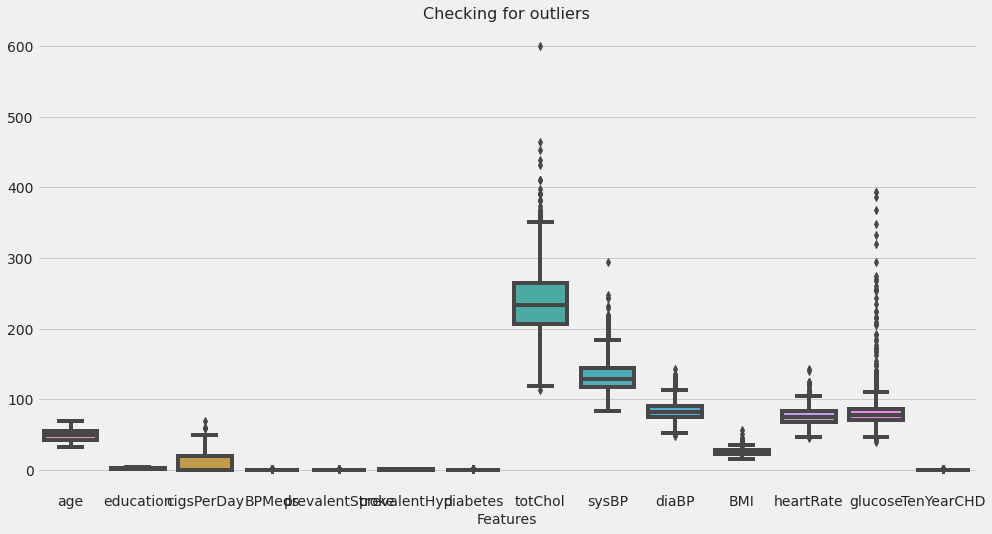

In [25]:
# Checking for Outliers
plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.title('Checking for outliers', size=16)
plt.xlabel('Features', size=14)
plt.show()

## **Visualization on Dependent and Independent Variables**

**Predict variable (desired target)**

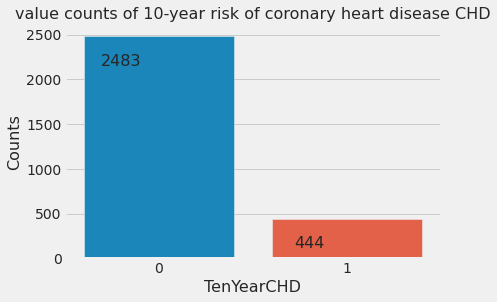

In [26]:
# value counts of 10-year risk of coronary heart disease CHD
plt.figure(figsize=(6,4))
ch = sns.countplot(df['TenYearCHD'])
plt.xlabel('TenYearCHD', size=16)
plt.ylabel('Counts', size=16)
plt.title('value counts of 10-year risk of coronary heart disease CHD', size=16)
for p in ch.patches:
    ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)
plt.show()

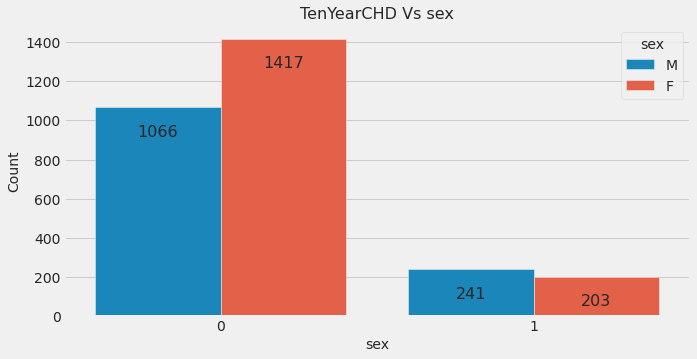

In [27]:
#plotting of Coronary heart diseases for Male and Female
plt.figure(figsize=(10,5))
ax = sns.countplot(x='TenYearCHD', hue='sex', data=df)
plt.title('TenYearCHD Vs sex', size=16)
plt.xlabel('sex', size=14)
plt.ylabel('Count', size=14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',  (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)

plt.show()

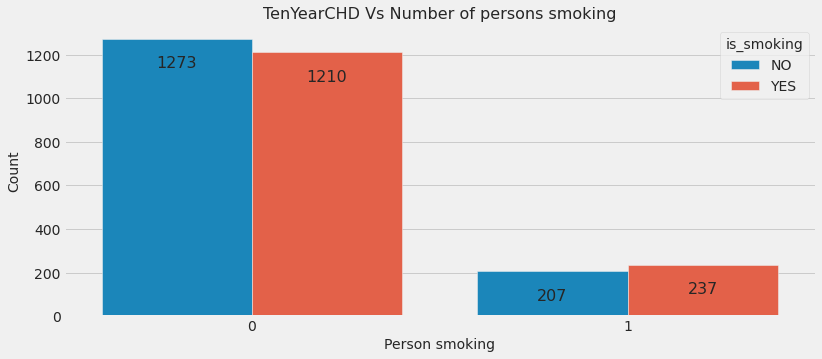

In [28]:
#plotting of CHD for number of smoking human being -
plt.figure(figsize=(12,5))
ax = sns.countplot(x='TenYearCHD', hue='is_smoking', data=df)
plt.title('TenYearCHD Vs Number of persons smoking', size=16)
plt.xlabel('Person smoking', size=14)
plt.ylabel('Count', size=14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',  (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)

plt.show()

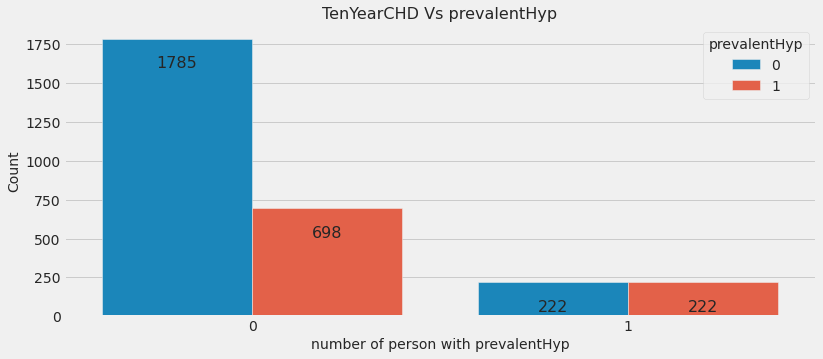

In [29]:
#plotting of CHD to check whether or not the patient was hypertensive
plt.figure(figsize=(12,5))
ax = sns.countplot(x='TenYearCHD', hue='prevalentHyp', data=df)
plt.title('TenYearCHD Vs prevalentHyp', size=16)
plt.xlabel('number of person with prevalentHyp', size=14)
plt.ylabel('Count', size=14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',  (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)

plt.show()

**value counts of male and female**

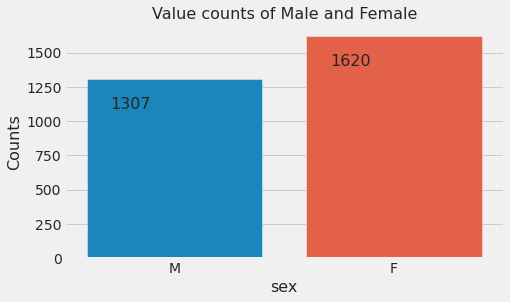

In [30]:
# value counts of male and female
plt.figure(figsize=(7,4))
ch = sns.countplot(df['sex'])
plt.xlabel('sex', size=16)
plt.ylabel('Counts', size=16)
plt.title('Value counts of Male and Female', size=16)
for p in ch.patches:
    ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)
plt.show()

**value counts of person smoking**

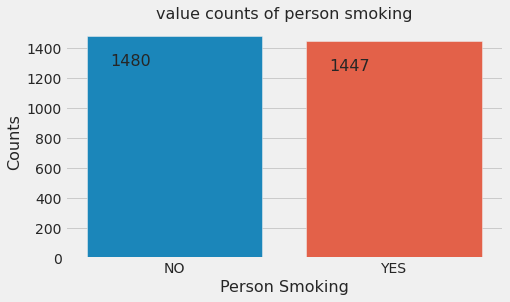

In [31]:
# value counts of person smoking
plt.figure(figsize=(7,4))
ch = sns.countplot(df['is_smoking'])
plt.xlabel('Person Smoking', size=16)
plt.ylabel('Counts', size=16)
plt.title('value counts of person smoking', size=16)
for p in ch.patches:
    ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)
plt.show()

**value counts of patient was on blood pressure medication**

In [32]:
# value counts of patient was on blood pressure medication
BPMeds = df['BPMeds'].dropna(0).value_counts()
BPMeds

0.0    2839
1.0      88
Name: BPMeds, dtype: int64

([<matplotlib.patches.Wedge at 0x7f396af5e0d0>,
 [Text(-0.6373922057404507, -0.8965105554656471, '0.0'),
  Text(0.6953370375618967, 0.9780114540201692, '1.0')],
 [Text(-0.34766847585842764, -0.48900575752671654, '97.0%'),
  Text(0.4056132719111064, 0.5705066815117654, '3.0%')])

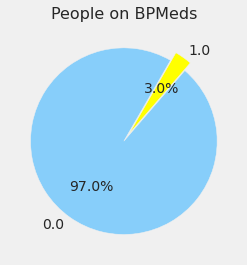

In [33]:
plt.rcParams['figure.figsize'] = 4,4
labels = df['BPMeds'].value_counts().index.tolist()
sizes = df['BPMeds'].value_counts().tolist()
plt.title('People on BPMeds', size=16)
colors = ['lightskyblue','yellow']
explode = (0, 0.1)
plt.pie(sizes, labels=labels,explode = (0, 0.1), colors=colors,autopct='%1.1f%%' ,startangle=60,textprops={'fontsize': 14})

**value counts of patient previously had a stroke**

In [34]:
#value counts of patient previously had a stroke
prevalentStroke = df['prevalentStroke'].value_counts()
prevalentStroke

0    2909
1      18
Name: prevalentStroke, dtype: int64

([<matplotlib.patches.Wedge at 0x7f396af28750>,
 [Text(-0.5683006948333067, -0.9418249944931282, '0'),
  Text(0.6199644214188407, 1.0274454322127293, '1')],
 [Text(-0.3099821971818036, -0.5137227242689789, '99.4%'),
  Text(0.36164591249432365, 0.5993431687907588, '0.6%')])

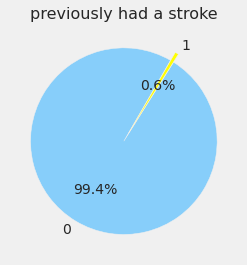

In [35]:
plt.rcParams['figure.figsize'] = 4,4
labels = df['prevalentStroke'].value_counts().index.tolist()
sizes = df['prevalentStroke'].value_counts().tolist()
plt.title('previously had a stroke', size=16)
colors = ['lightskyblue','yellow']
explode = (0, 0.1)
plt.pie(sizes, labels=labels,explode = (0, 0.1), colors=colors,autopct='%1.1f%%' ,startangle=60,textprops={'fontsize': 14})

**value counts of patient was hypertensive**

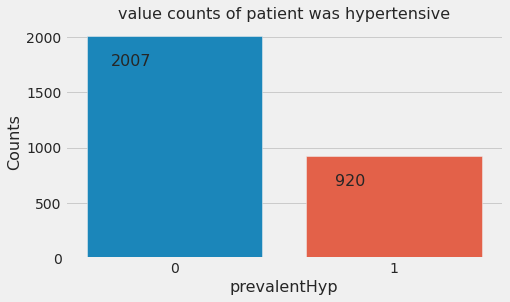

In [36]:
# value counts of patient was hypertensive
plt.figure(figsize=(7,4))
ch = sns.countplot(df['prevalentHyp'])
plt.xlabel('prevalentHyp', size=16)
plt.ylabel('Counts', size=16)
plt.title('value counts of patient was hypertensive', size=16)
for p in ch.patches:
    ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)
plt.show()

**value counts of patient had diabetes**

In [37]:
#value counts of patient had diabetes
diabetes = df['diabetes'].value_counts()
diabetes

0    2848
1      79
Name: diabetes, dtype: int64

([<matplotlib.patches.Wedge at 0x7f396b0d40d0>,
 [Text(-0.6287024474481075, -0.9026257433580984, '0'),
  Text(0.6858572903044546, 0.9846825769435708, '1')],
 [Text(-0.3429286076989677, -0.49234131455896274, '97.3%'),
  Text(0.40008341934426517, 0.5743981698837496, '2.7%')])

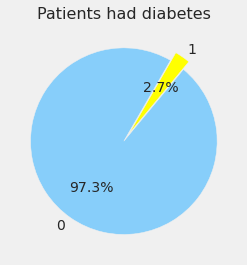

In [38]:
plt.rcParams['figure.figsize'] = 4,4
labels = df['diabetes'].value_counts().index.tolist()
sizes = df['diabetes'].value_counts().tolist()
plt.title('Patients had diabetes', size=16)
colors = ['lightskyblue','yellow']
explode = (0, 0.1)
plt.pie(sizes, labels=labels,explode = (0, 0.1), colors=colors,autopct='%1.1f%%' ,startangle=60,textprops={'fontsize': 14})

**Value Count of Age**

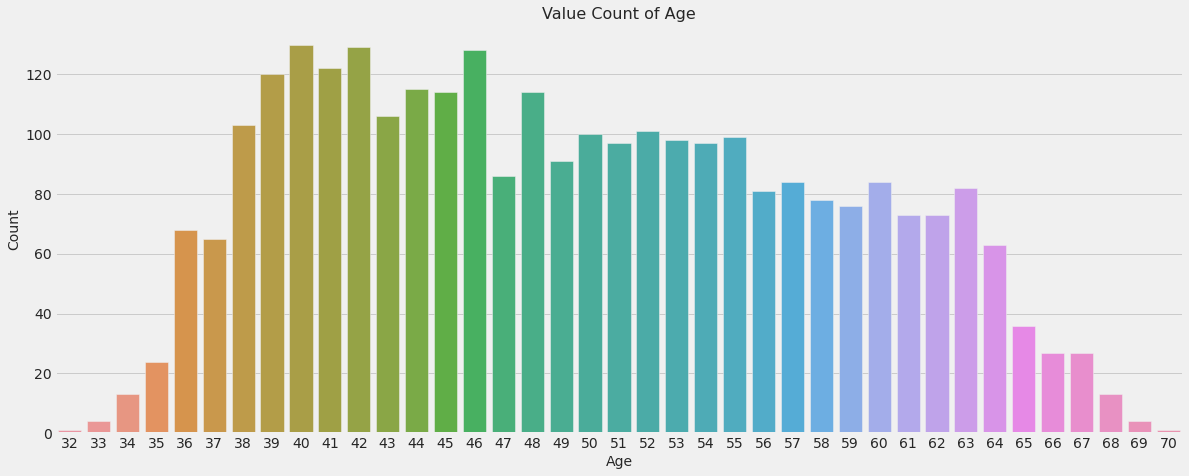

In [39]:
#value counts of age feature
plt.figure(figsize=(18,7))
sns.countplot(data=df,x='age')
plt.title('Value Count of Age', size=16)
plt.xlabel('Age', size=14)
plt.ylabel('Count', size=14)
plt.show()

**Age Vs Person Smoking**

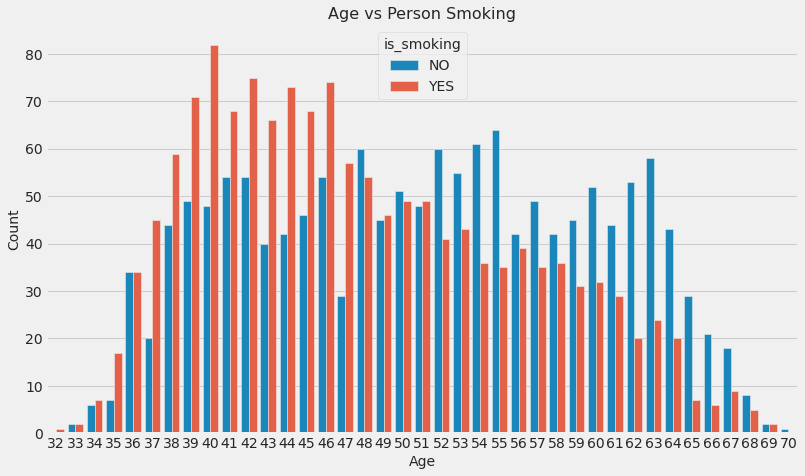

In [40]:
#visualization of person smoking on the basis of age
plt.figure(figsize=(12,7))
sns.countplot(data=df, x='age', hue='is_smoking')
plt.title('Age vs Person Smoking', size=16)
plt.xlabel('Age', size=14)
plt.ylabel('Count', size=14)
plt.show()

**Age vs.Heart Rate for Coronary Heart Disease**

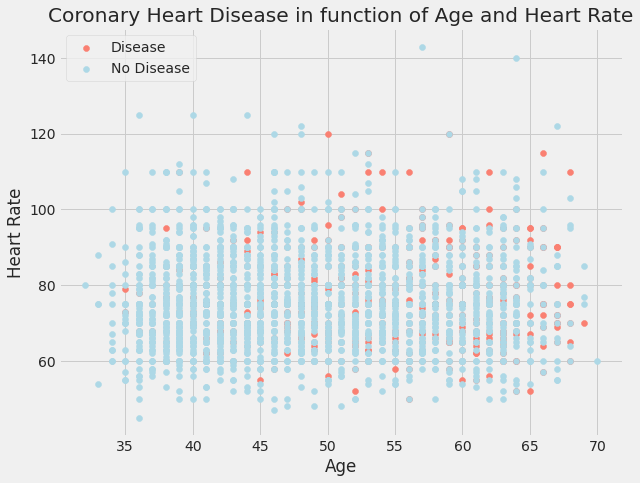

In [41]:
# Create another figure
plt.figure(figsize=(9, 7))

# Scatter with postivie examples
plt.scatter(df.age[df.TenYearCHD==1],
            df.heartRate[df.TenYearCHD==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.TenYearCHD==0],
            df.heartRate[df.TenYearCHD==0],
            c="lightblue")

# Add some helpful info
plt.title("Coronary Heart Disease in function of Age and Heart Rate")
plt.xlabel("Age")
plt.ylabel("Heart Rate")
plt.legend(["Disease", "No Disease"]);

# **Data Preparation**

## ***Let's observe the correlation in dataset***

In [42]:
corr_matrix = df.corr()
corr_matrix

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
age,1.000000,-0.161238,-0.184110,0.138570,0.049756,0.313543,0.111085,0.281156,0.405238,0.231322,0.141001,0.013947,0.108882,0.234423
education,-0.161238,1.000000,0.015506,-0.023534,-0.027410,-0.082675,-0.054464,-0.011575,-0.130417,-0.056034,-0.131304,-0.061501,-0.034099,-0.062442
cigsPerDay,-0.184110,0.015506,1.000000,-0.036866,-0.047461,-0.080570,-0.048959,-0.026606,-0.105104,-0.067483,-0.095310,0.055770,-0.064029,0.059797
BPMeds,0.138570,-0.023534,-0.036866,1.000000,0.114107,0.260039,0.069443,0.098210,0.280788,0.206209,0.088962,0.014681,0.069125,0.092868
prevalentStroke,0.049756,-0.027410,-0.047461,0.114107,1.000000,0.059703,0.013866,0.002418,0.061712,0.059594,0.029168,-0.018617,0.021427,0.052014
prevalentHyp,0.313543,-0.082675,-0.080570,0.260039,0.059703,1.000000,0.082510,0.162100,0.699240,0.612037,0.304790,0.154375,0.086143,0.169136
diabetes,0.111085,-0.054464,-0.048959,0.069443,0.013866,0.082510,1.000000,0.069232,0.108990,0.058115,0.090249,0.046822,0.617189,0.100006
totChol,0.281156,-0.011575,-0.026606,0.098210,0.002418,0.162100,0.069232,1.000000,0.210685,0.165101,0.113206,0.091487,0.066703,0.106473
sysBP,0.405238,-0.130417,-0.105104,0.280788,0.061712,0.699240,0.108990,0.210685,1.000000,0.783586,0.340782,0.180690,0.134609,0.217419
diaBP,0.231322,-0.056034,-0.067483,0.206209,0.059594,0.612037,0.058115,0.165101,0.783586,1.000000,0.391291,0.173350,0.074630,0.139005


(14.5, -0.5)

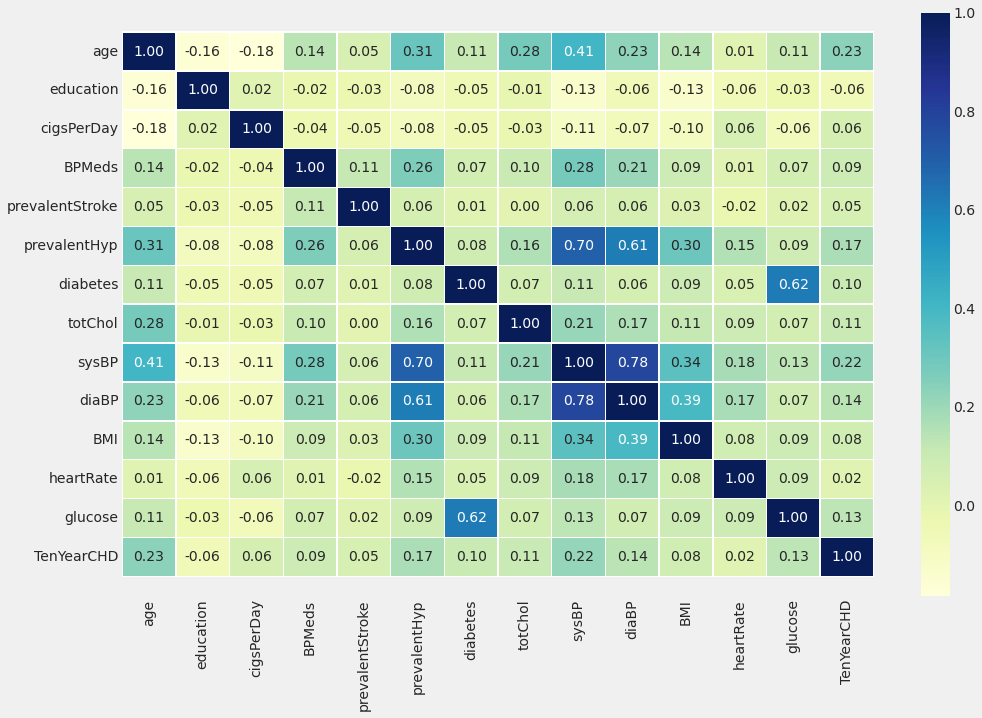

In [43]:
# Let's make our correlation matrix a little prettier
#visualization of the correlation in the heatmap
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

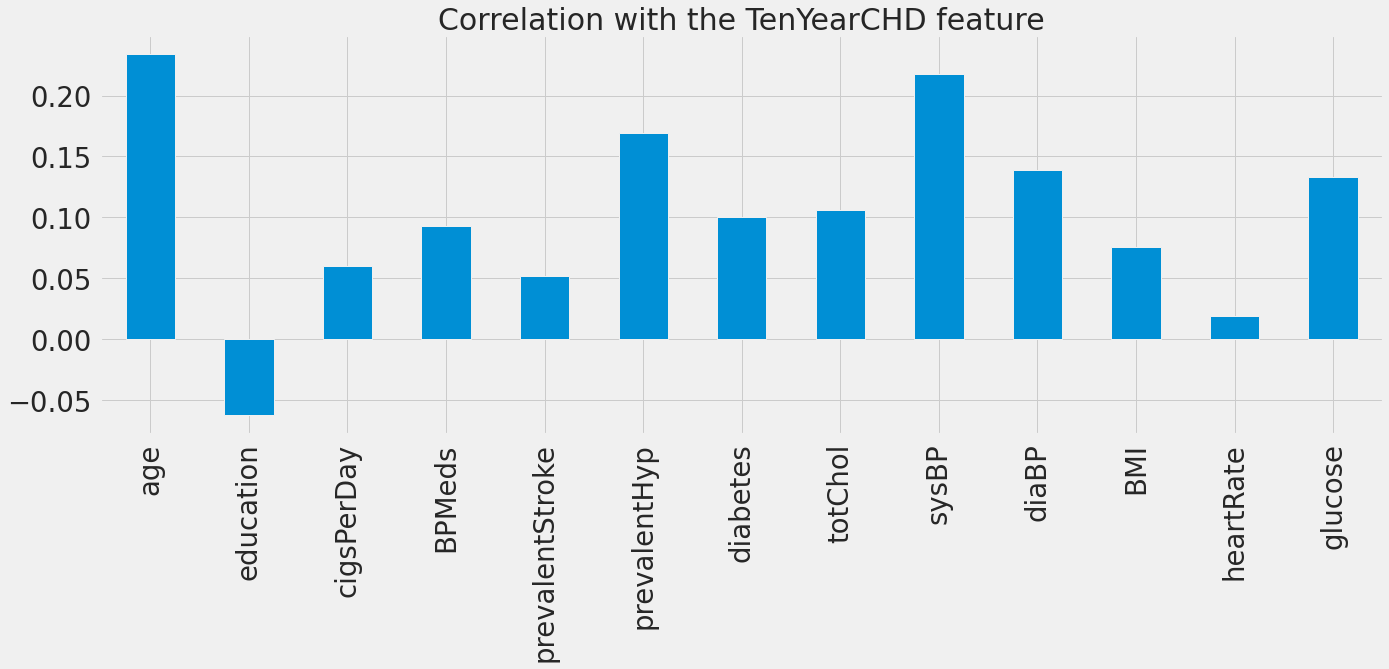

In [44]:
# Correlation of variables with Target Variable-
sns.set_context('notebook',font_scale = 2.5)
df.drop('TenYearCHD', axis=1).corrwith(df.TenYearCHD).plot(kind='bar', grid=True, figsize=(20, 10), 
                                                        title="Correlation with the TenYearCHD feature")
plt.tight_layout()

* HeartRate and prevalentStroke are the lowest correlated with the target variable.

*   All other variables have a significant correlation with the target i.e TenYearCHD variable.



# **Data Transformation**

After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models. First, I'll use the get_dummies method to create dummy columns for categorical variables.

In [45]:
# Adding pulse pressure as a column
df['pulsePressure'] = df['sysBP'] - df['diaBP']
# Dropping the systolic and diastolic BP columns
df.drop(['sysBP','diaBP'], axis = 1, inplace = True)
# Dropping the 'is_smoking' column
df.drop('is_smoking', axis = 1, inplace = True)

In [46]:
# To get the Categorical Variables
categorical_val = []
continous_val = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)
categorical_val

['education',
 'sex',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

### **One Hot Encoding**

In [47]:
# Creating dummy variables-
categorical_val.remove('TenYearCHD')
df=pd.get_dummies(df, columns = categorical_val)

In [48]:
df.head()

,age,cigsPerDay,totChol,BMI,heartRate,glucose,TenYearCHD,pulsePressure,education_1.0,education_2.0,...,sex_F,sex_M,BPMeds_0.0,BPMeds_1.0,prevalentStroke_0,prevalentStroke_1,prevalentHyp_0,prevalentHyp_1,diabetes_0,diabetes_1
1,36,0.0,212.0,29.77,72.0,75.0,0,70.0,0,0,...,0,1,1,0,1,0,0,1,1,0
2,46,10.0,250.0,20.35,88.0,94.0,0,45.0,1,0,...,1,0,1,0,1,0,1,0,1,0
3,50,20.0,233.0,28.26,68.0,94.0,1,70.0,1,0,...,0,1,1,0,1,0,0,1,1,0
4,64,30.0,241.0,26.42,70.0,77.0,0,51.5,1,0,...,1,0,1,0,1,0,1,0,1,0
5,61,0.0,272.0,32.80,85.0,65.0,1,61.0,0,0,...,1,0,1,0,1,0,0,1,1,0


In [49]:
print(df.columns)
print(df.columns)

Index(['age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD', 'pulsePressure', 'education_1.0', 'education_2.0',
       'education_3.0', 'education_4.0', 'sex_F', 'sex_M', 'BPMeds_0.0',
       'BPMeds_1.0', 'prevalentStroke_0', 'prevalentStroke_1',
       'prevalentHyp_0', 'prevalentHyp_1', 'diabetes_0', 'diabetes_1'],
      dtype='object')
Index(['age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD', 'pulsePressure', 'education_1.0', 'education_2.0',
       'education_3.0', 'education_4.0', 'sex_F', 'sex_M', 'BPMeds_0.0',
       'BPMeds_1.0', 'prevalentStroke_0', 'prevalentStroke_1',
       'prevalentHyp_0', 'prevalentHyp_1', 'diabetes_0', 'diabetes_1'],
      dtype='object')


## ***Scaling the data for model fitting-***

StandardScaler: To scale all the features, so that the Machine Learning model better adapts to the dataset

In [50]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose', 'pulsePressure']
df[col_to_scale] = s_sc.fit_transform(df[col_to_scale])
df.head()

,age,cigsPerDay,totChol,BMI,heartRate,glucose,TenYearCHD,pulsePressure,education_1.0,education_2.0,...,sex_F,sex_M,BPMeds_0.0,BPMeds_1.0,prevalentStroke_0,prevalentStroke_1,prevalentHyp_0,prevalentHyp_1,diabetes_0,diabetes_1
1,-1.571403,-0.767017,-0.563362,0.962052,-0.324858,-0.287701,0,1.362151,0,0,...,0,1,1,0,1,0,0,1,1,0
2,-0.408034,0.074680,0.288548,-1.319002,1.011910,0.500588,0,-0.317045,1,0,...,1,0,1,0,1,0,1,0,1,0
3,0.057314,0.916378,-0.092570,0.596406,-0.659050,0.500588,1,1.362151,1,0,...,0,1,1,0,1,0,0,1,1,0
4,1.686031,1.758075,0.086780,0.150850,-0.491954,-0.204723,0,0.119546,1,0,...,1,0,1,0,1,0,1,0,1,0
5,1.337020,-0.767017,0.781759,1.695767,0.761266,-0.702590,1,0.757641,0,0,...,1,0,1,0,1,0,0,1,1,0


## ***Implementation of Models-***

In [51]:
# To get the metrics of the models
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
         
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")   


Train and Test data sets

In [52]:
# Importing packages to split data into train and test
from sklearn.model_selection import train_test_split

X = df.drop('TenYearCHD', axis=1)
y = df.TenYearCHD

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

## **Logistic Regression**

In [53]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 85.94%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.860534    0.769231  0.859375     0.814882      0.847070
recall        0.996564    0.066225  0.859375     0.531394      0.859375
f1-score      0.923567    0.121951  0.859375     0.522759      0.805360
support    1746.000000  302.000000  0.859375  2048.000000   2048.000000
_______________________________________________
Confusion Matrix: 
 [[1740    6]
 [ 282   20]]

Test Result:
Accuracy Score: 84.87%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.848730    0.846154  0.848692    0.847442      0.848314
recall       0.997286    0.077465  0.848692    0.537376      0.848692
f1-score     0.917031    0.141935  0.848692    0.529483      0.791816
support    737.000000  142.000000  0.848692  879.

In [54]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.9375,84.86917


## **K-nearest neighbors**

In [55]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.67%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.876341    0.659341  0.866699     0.767841      0.844342
recall        0.982245    0.198675  0.866699     0.590460      0.866699
f1-score      0.926276    0.305344  0.866699     0.615810      0.834713
support    1746.000000  302.000000  0.866699  2048.000000   2048.000000
_______________________________________________
Confusion Matrix: 
 [[1715   31]
 [ 242   60]]

Test Result:
Accuracy Score: 82.82%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.845519    0.354839  0.828214    0.600179      0.766251
recall       0.972863    0.077465  0.828214    0.525164      0.828214
f1-score     0.904732    0.127168  0.828214    0.515950      0.779119
support    737.000000  142.000000  0.828214  879.

In [56]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.937500,84.869170
1,K-nearest neighbors,86.669922,82.821388


## **Support Vector machine**

In [57]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 85.99%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.858829    1.000000  0.859863     0.929415      0.879646
recall        1.000000    0.049669  0.859863     0.524834      0.859863
f1-score      0.924054    0.094637  0.859863     0.509346      0.801747
support    1746.000000  302.000000  0.859863  2048.000000   2048.000000
_______________________________________________
Confusion Matrix: 
 [[1746    0]
 [ 287   15]]

Test Result:
Accuracy Score: 83.85%
_______________________________________________
CLASSIFICATION REPORT:
                    0      1  accuracy   macro avg  weighted avg
precision    0.838453    0.0  0.838453    0.419226      0.703003
recall       1.000000    0.0  0.838453    0.500000      0.838453
f1-score     0.912129    0.0  0.838453    0.456064      0.764777
support    737.000000  142.0  0.838453  879.000000    879.000000
____

In [58]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.937500,84.869170
1,K-nearest neighbors,86.669922,82.821388
2,Support Vector Machine,85.986328,83.845279


## **Random Forest**

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision     1.0    1.0       1.0        1.0           1.0
recall        1.0    1.0       1.0        1.0           1.0
f1-score      1.0    1.0       1.0        1.0           1.0
support    1746.0  302.0       1.0     2048.0        2048.0
_______________________________________________
Confusion Matrix: 
 [[1746    0]
 [   0  302]]

Test Result:
Accuracy Score: 83.96%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.843318    0.545455   0.83959    0.694386      0.795199
recall       0.993216    0.042254   0.83959    0.517735      0.839590
f1-score     0.912150    0.078431   0.83959    0.495290      0.777465
support    737.000000  142.000000   0.83959  879.000000    879.000000
______________________________________

In [60]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.937500,84.869170
1,K-nearest neighbors,86.669922,82.821388
2,Support Vector Machine,85.986328,83.845279
3,Random Forest Classifier,100.000000,83.959044


## **XGBoost Classifer**

In [61]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 87.65%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.874937    0.929825  0.876465     0.902381      0.883031
recall        0.997709    0.175497  0.876465     0.586603      0.876465
f1-score      0.932299    0.295265  0.876465     0.613782      0.838361
support    1746.000000  302.000000  0.876465  2048.000000   2048.000000
_______________________________________________
Confusion Matrix: 
 [[1742    4]
 [ 249   53]]

Test Result:
Accuracy Score: 83.28%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.843823    0.380952  0.832765    0.612388      0.769047
recall       0.982361    0.056338  0.832765    0.519349      0.832765
f1-score     0.907837    0.098160  0.832765    0.502998      0.777036
support    737.000000  142.000000  0.832765  879.

In [62]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["XGBoost Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.937500,84.869170
1,K-nearest neighbors,86.669922,82.821388
2,Support Vector Machine,85.986328,83.845279
3,Random Forest Classifier,100.000000,83.959044
4,XGBoost Classifier,87.646484,83.276451


## **Hyperparameter Tuning**

## **Logistic Regression Hyperparameter Tuning**

In [63]:
from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': 0.03359818286283781, 'solver': 'liblinear'}
Train Result:
Accuracy Score: 85.79%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.858905    0.761905   0.85791     0.810405      0.844601
recall        0.997136    0.052980   0.85791     0.525058      0.857910
f1-score      0.922873    0.099071   0.85791     0.510972      0.801394
support    1746.000000  302.000000   0.85791  2048.000000   2048.000000
_______________________________________________
Confusion Matrix: 
 [[1741    5]
 [ 286   16]]

Test Result:
Accuracy Score: 84.64%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.845977    0.888889  0.846416    0.867433      0.852909
recall       0.998643    0.056338  0.846416    0.527491     

In [64]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

tuning_results_df = pd.DataFrame(data=[["Tuned Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,85.791016,84.641638


### **K-nearest neighbors Hyperparameter Tuning**

In [65]:
train_score = []
test_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))
#     test_score.append(accuracy_score(y_test, model.predict(X_test)))

Maximum KNN score on the test data: 100.00%


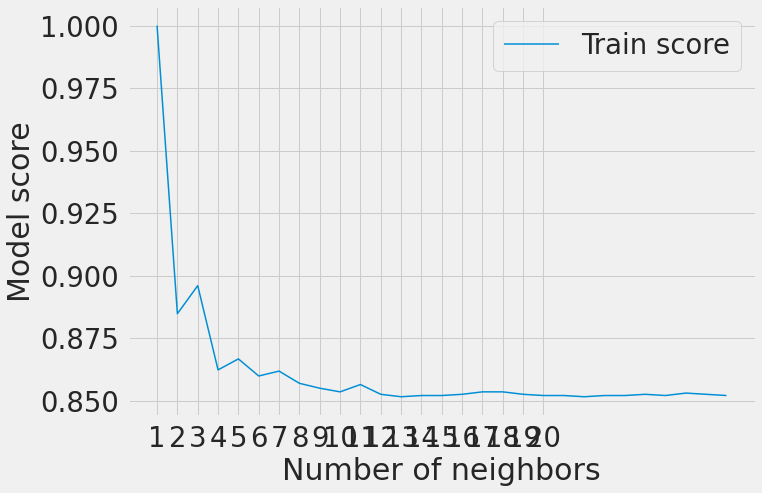

In [66]:
plt.figure(figsize=(10, 7))

plt.plot(neighbors, train_score, label="Train score")
# plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(train_score)*100:.2f}%")

In [67]:
knn_clf = KNeighborsClassifier(n_neighbors=27)
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 85.30%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.853647    0.600000  0.853027     0.726823      0.816244
recall        0.998855    0.009934  0.853027     0.504394      0.853027
f1-score      0.920560    0.019544  0.853027     0.470052      0.787695
support    1746.000000  302.000000  0.853027  2048.000000   2048.000000
_______________________________________________
Confusion Matrix: 
 [[1744    2]
 [ 299    3]]

Test Result:
Accuracy Score: 84.07%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.840365    1.000000  0.840728    0.920182      0.866153
recall       1.000000    0.014085  0.840728    0.507042      0.840728
f1-score     0.913259    0.027778  0.840728    0.470518      0.770212
support    737.000000  142.000000  0.840728  879.

In [68]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,85.791016,84.641638
1,Tuned K-nearest neighbors,85.302734,84.072810


## **XGBoost Classifier Hyperparameter Tuning**

In [69]:
param_grid = dict(
    n_estimators=stats.randint(10, 1000),
    max_depth=stats.randint(1, 10),
    learning_rate=stats.uniform(0, 1)
)

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_cv = RandomizedSearchCV(
    xgb_clf, param_grid, cv=3, n_iter=50, 
    scoring='accuracy', n_jobs=-1, verbose=1
)
xgb_cv.fit(X_train, y_train)
best_params = xgb_cv.best_params_
print(f"Best paramters: {best_params}")

xgb_clf = XGBClassifier(**best_params)
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best paramters: {'learning_rate': 0.3007571066720406, 'max_depth': 1, 'n_estimators': 169}
Train Result:
Accuracy Score: 86.62%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.867265    0.818182  0.866211     0.842724      0.860028
recall        0.995418    0.119205  0.866211     0.557312      0.866211
f1-score      0.926933    0.208092  0.866211     0.567513      0.820932
support    1746.000000  302.000000  0.866211  2048.000000   2048.000000
_______________________________________________
Confusion Matrix: 
 [[1738    8]
 [ 266   36]]

Test Result:
Accuracy Score: 84.30%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.847045    0.625000  0.843003    0.736023      0.811174
recall       0.991859    0.070423  0

In [70]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned XGBoost Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,85.791016,84.641638
1,Tuned K-nearest neighbors,85.302734,84.072810
2,Tuned XGBoost Classifier,86.621094,84.300341


In [71]:
results_df


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.937500,84.869170
1,K-nearest neighbors,86.669922,82.821388
2,Support Vector Machine,85.986328,83.845279
3,Random Forest Classifier,100.000000,83.959044
4,XGBoost Classifier,87.646484,83.276451


### **Intrepretation :**



*   Logistic Regression,KNN ,SVM ,Random Forest classifier and XGBoost Classifier models were implemented.
*   From above these models,we found that KNN and Random Forest Regressors are the best fitted model compared to other models
*   In Hyperparameter tuning ,we observed that K-Nearest Neighbors accuracy has improved which shows that KNN (with Hyperparameter Tuning) is the best fitted model for Coronary Heart Disease dataset.

 Train Accuracy = **85.30**
    & Test  Accuracy = **84.07**


